## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#Read the data
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
#Number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
# The number of unique users
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
#The proportion of users that converted to a page = no of users convereted = 1 / total no. of users
df[df['converted'] == 1].shape[0] / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
 # The no of times treatment group isn't given a new page or vice-versa
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")').shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
#checking for missing values.
df.info()
#we see that there are no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#Drop rows which have mismatched group and landing page
condition =  df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')
condition.shape[0]
df.drop(condition.index, axis=0, inplace=True)
df2 = pd.DataFrame(df)


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#The no of user id in df2
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#Check for duplicate user_ids
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
#see the info related to the duplicate id.
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#Drop the duplicates
df2.drop_duplicates(inplace = True)
df2.duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#probability of user converting regardless of page = no of user coverted / total no of users
df2[df2['converted'] == 1].shape[0] / df2.shape[0]

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [74]:
 #The no of users in the control group who converted  / total no of users in control group
df2.query('(group == "control" and converted == 1)').shape[0] / df2.query('group =="control"').shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [75]:
# The no of users in the treatment group who converted  / total no of users in treatment group
df2.query('(group == "treatment" and converted == 1)').shape[0] /  df2.query('group =="treatment"').shape[0]

0.11880724790277405

d. What is the probability that an individual received the new page?

In [18]:
# no of users who received a new page / no  of users
df2[df2['landing_page']=="new_page"].shape[0] /df2.shape[0]

0.5000636646764286

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

.We see that the overall conversion rate is  0.1195
.We see that the conversion rate for control group was  0.120  and the conversion rate of treatment group is  0.118
.We also see that 50% of the users is received the new page .
.However the difference between the old page and new page  for conversion rate is too less and not enough evidence for forming   conclusions .We need to do more testing.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The null hypothesis is that the old page is better or conversion rate is same as the new page.
H0 :  Pold >= Pnew
The alternative hypothesis is that the new page has a higher conversion rate than the old page .
H1 :  Pold < Pnew

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
#For the null hypothesis we have assumed that the conversion rate for a new page and old page is equal . According to this regardless 
#of the page the conversion rate is equal
p_new = df2.query('converted == 1')['user_id'].shape[0] / df2.shape[0]
p_new

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2.query('converted == 1')['user_id'].shape[0] / df2.shape[0]
p_old

0.11959667567149027

c. What is $n_{new}$?

In [21]:
#The no of users which got the new page and hence are in the treatment group
n_new = df2.query('group =="treatment"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$?

In [22]:
#The no of users which got the old page and hence are in the old group
n_old = df2.query('group =="control"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([1,0] , size = n_new , p = (p_new,1-p_new))
npc_mean = new_page_converted.mean()


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([1,0] , size = n_old , p = (p_old,1-p_old))
opc_mean = old_page_converted.mean()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
npc_mean - opc_mean

0.0015808729322591836

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    sample = df2.sample(size , replace = True)
    new_page_converted = np.random.choice([1,0] , size = n_new , p = (p_new,1-p_new))
    npc_mean = new_page_converted.mean()
    old_page_converted = np.random.choice([1,0] , size = n_old , p = (p_old,1-p_old))
    opc_mean = old_page_converted.mean()
    p_diffs.append(npc_mean - opc_mean)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  15.,  160.,  725., 2053., 3008., 2451., 1183.,  349.,   48.,
           8.]),
 array([-0.00439322, -0.00345578, -0.00251833, -0.00158089, -0.00064345,
         0.000294  ,  0.00123144,  0.00216889,  0.00310633,  0.00404377,
         0.00498122]),
 <a list of 10 Patch objects>)

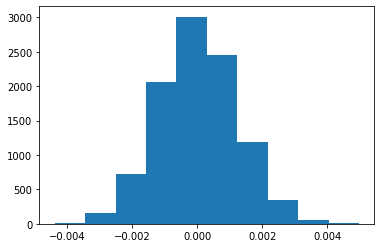

In [30]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [60]:
#Get the observed difference

control_converted= df2.query('group == "control"')['converted'].mean()
treatment_converted = df2.query('group == "treatment"')['converted'].mean()
obs_diffs = treatment_converted  - control_converted
obs_diffs

-0.0015790565976871451

In [61]:
p_diffs = np.array(p_diffs)
np.std(p_diffs),np.mean(p_diffs)

(0.001211415296217654, 2.26552049044277e-05)

In [62]:
#Calculating the p-value 
pvalue = (p_diffs > obs_diffs).mean()
pvalue

0.91

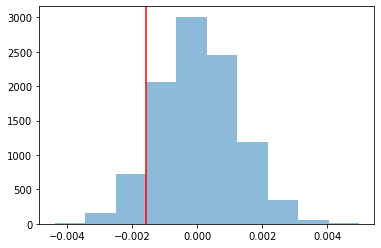

In [57]:
plt.hist(p_diffs, alpha=.5)
plt.axvline(x=obs_diffs, color='red' );


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?


In part j we computed the p-value.''In statistical hypothesis testing, the p-value or probability value is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct.''(https://en.wikipedia.org/wiki/P-value)

From the above computation we see that we computed the p-value which is 0.91 . We see that the p-value is pretty large which suggest that we fail to reject the null hypothesis and it is also mentioned that the Type 1 error rate is 0.05 and we know that if p-value is greater than the type 1 error rate we should consider the null hypothesis to be true.So we say that old page is equal or better than the old page.

The result of p-value suggests theat the result is statistically insignificant and that we should stick with the null hypothesis.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [46]:
df2copy = df2.copy()


In [44]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df.query('landing_page == "old_page"').shape[0]
n_new = df[df['landing_page'] == "new_page"]['user_id'].nunique()
convert_old , convert_new, n_old , n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [66]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value


(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

.We see that the z-score is 1.31 and p-value of 0.905.
.The absolute value of the z-score tells you how many standard deviations you are away from the mean.
.Both p-value and z-score suggest whether to reject or accept the null hypothesis.
.A small z-score accompanied with a large p-score suggest that we fail to reject the null hypothesis.
.A z-score of is 1.3 is 1.3 standard deviations above the mean which supports a pvalue of 90%

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression as there is a categorical variable (converted or not converted).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
df2copy['intercept'] = 1
df2copy[['new_page', 'old_page']] = pd.get_dummies(df2copy['landing_page'])
df2copy[['control', 'ab_page']] = pd.get_dummies(df2copy['group'])
df2copy.head()


,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [48]:
df2copy.drop(['new_page', 'control' ], axis=1, inplace=True)
df2copy.head()


,user_id,timestamp,group,landing_page,converted,intercept,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [49]:
logit_mod = sm.Logit(df2copy['converted'], df2copy[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Feb 2020   Pseudo R-squ.:               8.085e-06
Time:                        21:19:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

In [78]:
1/np.exp(-0.0150) 


1.015113064615719

. The ab_page (new page or treatament page) is  less likely  1.015 times to convert a user than the old page holding all else     constant. 
. The intercept is defined as the predicted value of the response  when x variable is zero .
. The slope is defined as the predicted change in the response for every one unit increase in the x-variable.
. The p-value for ab_page is 0.190 which isn't statistically significant .




e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

.The p-value of ab_page is 0.190.
.The p-value differs from part 2 as unlike A/B tests , regression p-value is whether the value of slope is zero or not.
.From the above results we see that old_page(intercept) has p_value 0.00 which mean that null hypothesis is true and it is statistically significant.
.Ab-page p-value of 0.190 is non zero and statistically unsignificant hence we fail to reject the null hypothesis.
.P values have a different values in regression as regression is a two-tailed test and the p-values relate to the slope.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

.The issues that may occur when adding other factors to the regression model are 
1) the x-variables are correlated with each other .
2) Outliers could come up.
3) When x variables aren't linearly related higher order terms need to be considered.
.The advantage of adding other factors to the regression model is that it could provide new insights at the same time we also need to be careful about the simpson's paradox.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [71]:
countries_df = pd.read_csv('./countries.csv')
df_coun = countries_df.set_index('user_id').join(df2copy.set_index('user_id'), how='inner')
df_coun['country'].unique()

array(['US', 'UK', 'CA'], dtype=object)

In [72]:
### Create the necessary dummy variables
df_coun[['CA', 'UK', 'US']] = pd.get_dummies(df_coun['country'])
df_coun.head()


,country,timestamp,group,landing_page,converted,intercept,old_page,ab_page,CA,UK,US
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [73]:
### Fit Your Linear Model And Obtain the Results
logit_mod = sm.Logit(df_coun['converted'], df_coun[['intercept', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:               1.521e-05
Time:                        04:29:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.315      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [79]:
1/np.exp(-0.0408), np.exp(0.0099)


(1.0416437559600236, 1.0099491671175422)

Compared to  US(The intercept or baseline :
1) CA is 1.0416 times less likely to convert holding everything else constant.
2) UK is 1.009949 times more likely to convert holding everything else constant.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.